# Customer Churn Prediction using ANN

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv(r'D:\Academics\Project Data Set\Customer Churn Prediction\customer Churn Prediction using ANN.csv')
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [31]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]

In [33]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns = input_data.columns)

In [34]:
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [35]:
input_data.shape

(10000, 8)

In [36]:
x_test.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.03067,-1.013811


### In Deeplearing and ANN - always remember to ***<u>Scale your data</u>***.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [57]:
x_train.shape

(8000, 8)

In [59]:
y_test.shape

(2000,)

In [143]:
import tensorflow

from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [180]:
ann = Sequential()

In [181]:
ann.add(Dense(6, input_dim = 8, activation='relu', kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5)) # > 0.5 ~ 50% drropout layer
ann.add(BatchNormalization())
ann.add(Dense(4, activation='relu', kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
ann.add(BatchNormalization())
ann.add(Dense(2, activation='relu', kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid')) # not using 'BatchNormalization' for output layer as we need output in 1 & 0 only
# wont use drop out in output layer as output is one and it'll remain that

In [182]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [183]:
ann.fit(x_train, y_train, batch_size=100, epochs=50, validation_data = (x_test, y_test), callbacks= EarlyStopping()) # Validation_data shows testing accuracy during 'history' check
# x_train has 8000 rows. It  makes batches each with 100

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6276 - loss: 0.8177 - val_accuracy: 0.7980 - val_loss: 0.7432
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6612 - loss: 0.7465 - val_accuracy: 0.7820 - val_loss: 0.6997
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6950 - loss: 0.6940 - val_accuracy: 0.7825 - val_loss: 0.6549
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7276 - loss: 0.6487 - val_accuracy: 0.7930 - val_loss: 0.6117
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7655 - loss: 0.6038 - val_accuracy: 0.8100 - val_loss: 0.5652
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.5590 - val_accuracy: 0.8250 - val_loss: 0.5199
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.5113 - val_accuracy: 0.8295 - val_loss: 0.4798
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8356 - loss: 0.4721 - val_accuracy: 0.8490 - val_loss

### 'callbacks = Earlystopping' - stops at the point where it feels the model is getting overfitted
###

In [184]:
len(test_accuracy)

50

In [185]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [186]:
prd

array([[0.08669572],
       [0.07004751],
       [0.10858139],
       ...,
       [0.6660229 ],
       [0.14569415],
       [0.14783165]], dtype=float32)


#### As data comes here as decimal but we need in terms of Binay so we'll aply a for loop to convert more than 0.5 into 1 andrest into 0.

In [187]:
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [188]:
prd = ann.predict(x_train)
prd_data1 = []
for i in prd:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

prd_data1

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [189]:
from sklearn.metrics import accuracy_score
print("Testing Accuracy :")
accuracy_score(y_test, prd_data)*100

Testing Accuracy :


85.7

In [190]:
print("Training Accuray :")
accuracy_score(y_train, prd_data1)*100

Training Accuray :


85.3375

### Putting New data to get result from the model >

In [191]:
prd = ann.predict(np.array([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.03067,-1.013811]]))
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[0]

In [192]:
ann.history.history

{'accuracy': [0.6276249885559082,
  0.6612499952316284,
  0.6949999928474426,
  0.7276250123977661,
  0.765500009059906,
  0.7940000295639038,
  0.8197500109672546,
  0.8356249928474426,
  0.8388749957084656,
  0.843874990940094,
  0.8458750247955322,
  0.8523749709129333,
  0.8504999876022339,
  0.8489999771118164,
  0.8517500162124634],
 'loss': [0.8177030682563782,
  0.7464760541915894,
  0.6940285563468933,
  0.6487316489219666,
  0.6038041710853577,
  0.5590229034423828,
  0.5112608671188354,
  0.47213974595069885,
  0.44642284512519836,
  0.4249093532562256,
  0.4127832055091858,
  0.4010276198387146,
  0.39371806383132935,
  0.38859498500823975,
  0.3822447657585144],
 'val_accuracy': [0.7979999780654907,
  0.7820000052452087,
  0.7825000286102295,
  0.7929999828338623,
  0.8100000023841858,
  0.824999988079071,
  0.8295000195503235,
  0.8489999771118164,
  0.8495000004768372,
  0.8489999771118164,
  0.8535000085830688,
  0.8565000295639038,
  0.8565000295639038,
  0.85799998044

#### here we are only getting 'Taining Accuracy'. 
To get testing accuracy put 'validation_data = (x_test, y_test)'

In [193]:
# to check only 'train_accuracy'
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']

In [194]:
len(train_accuracy)  # to put range for plot

15

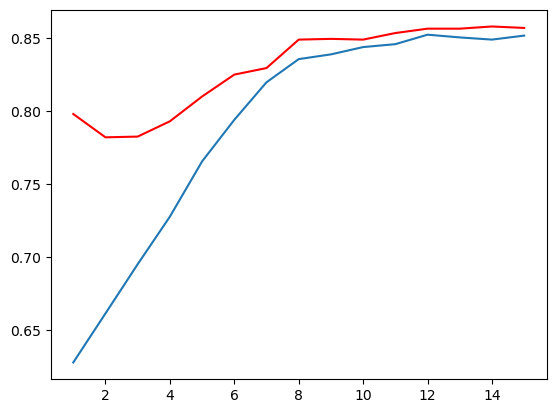

In [196]:
plt.plot([i for i in range (1,16)], train_accuracy)  # as after Earlystoppig it ran only 3 times
plt.plot([i for i in range (1,16)], test_accuracy,c = 'red')
plt.show()

### Kernel_regulizer & Earlystopping - betters model accuracy
### batchNormalizer, Dropoutlayer - no need to use Dropoutlayer unless the model is highly overfitted.

If on fit cell - the loss remains same -- Vanishing Gradient Decent Problem.